In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

## Data Import and Inspection

In [2]:
train_data = pd.read_csv("train.csv",index_col='PassengerId')
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
train_data[train_data.duplicated()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,


In [6]:
for col in train_data.columns:
    print("\n",col)
    print(len(train_data[col].unique()))


 Survived
2

 Pclass
3

 Name
891

 Sex
2

 Age
89

 SibSp
7

 Parch
7

 Ticket
681

 Fare
248

 Cabin
148

 Embarked
4


In [7]:
test_data = pd.read_csv("test.csv",index_col='PassengerId')
test_data.head(3)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [9]:
test_data.isnull().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
test_data[test_data.duplicated()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,


In [11]:
for col in test_data.columns:
    print("\n",col)
    print(len(test_data[col].unique()))


 Pclass
3

 Name
418

 Sex
2

 Age
80

 SibSp
7

 Parch
8

 Ticket
363

 Fare
170

 Cabin
77

 Embarked
3


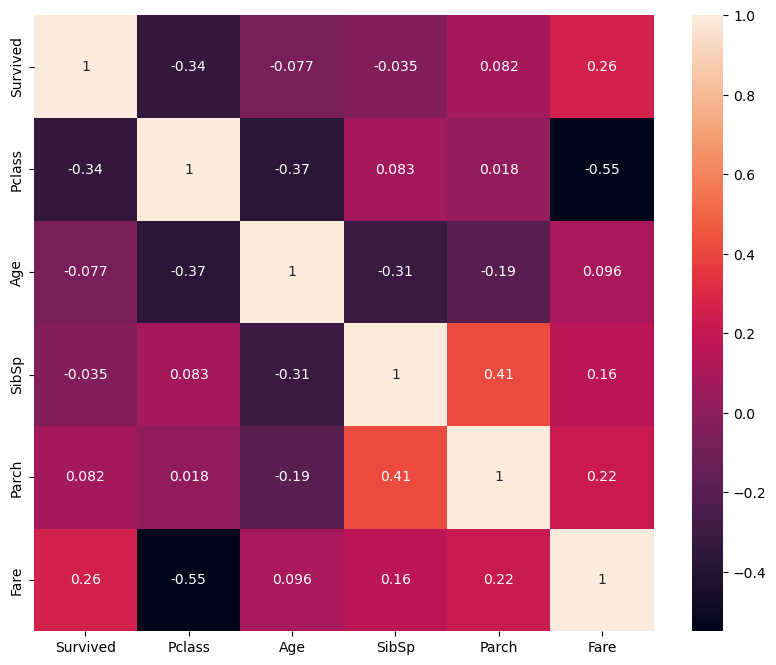

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(train_data.corr(numeric_only=True),annot=True)
plt.show()

## Conclusions From Data Inspection are Following :- 

### 1. Features Like " Name " and " Ticket "(number) seem irrelevant feature for model because they will be unique for every entry hence will be dropped 

### 2. Feature "Cabin" has many null values and being categorical by nature has many value counts hence will drop it 

## EDA

In [13]:
train_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
test_data[test_data['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


## Dealing with Irrelevant Features and Null Data

In [20]:
train_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)
test_data.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [21]:
train_data.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S


In [22]:
test_data.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q


## Dealing with Null Data

In [23]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [24]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0],inplace=True)

In [27]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [25]:
test_data['Age'].mean()

30.272590361445783

In [26]:
test_data['Fare'].mean()

35.627188489208635

In [30]:
train_data['Age'].fillna(train_data['Age'].mean(),inplace=True)

In [31]:
train_data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [32]:
test_data.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [35]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


In [36]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 26.1+ KB


## Dealing with Categorical Data

In [39]:
train_data['Sex'] = pd.get_dummies(train_data['Sex'],drop_first=True)
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [43]:
train_data[['Q_Embarked','S_Embarked']] = pd.get_dummies(train_data['Embarked'],drop_first=True)

In [45]:
train_data.drop('Embarked',axis=1,inplace=True)

In [46]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0,1
2,1,1,0,38.0,1,0,71.2833,0,0
3,1,3,0,26.0,0,0,7.9250,0,1
4,1,1,0,35.0,1,0,53.1000,0,1
5,0,3,1,35.0,0,0,8.0500,0,1


In [47]:
train_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Q_Embarked    0
S_Embarked    0
dtype: int64

In [48]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    uint8  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Q_Embarked  891 non-null    uint8  
 8   S_Embarked  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [49]:
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,male,34.5,0,0,7.8292,Q
893,3,female,47.0,1,0,7.0000,S
894,2,male,62.0,0,0,9.6875,Q
895,3,male,27.0,0,0,8.6625,S
896,3,female,22.0,1,1,12.2875,S


In [50]:
test_data['Sex'] = pd.get_dummies(test_data['Sex'],drop_first=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,Q
893,3,0,47.0,1,0,7.0000,S
894,2,1,62.0,0,0,9.6875,Q
895,3,1,27.0,0,0,8.6625,S
896,3,0,22.0,1,1,12.2875,S


In [51]:
test_data[['Q_Embarked','S_Embarked']] = pd.get_dummies(test_data['Embarked'],drop_first=True)
test_data.drop('Embarked',axis=1,inplace=True)
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,0,1
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,0,1
896,3,0,22.0,1,1,12.2875,0,1


In [52]:
test_data.isnull().sum()

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Q_Embarked    0
S_Embarked    0
dtype: int64

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    uint8  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Q_Embarked  418 non-null    uint8  
 7   S_Embarked  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


In [54]:
y,x = train_data['Survived'],train_data.drop('Survived',axis=1)

In [55]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [56]:
x.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,
1,3,1,22.0,1,0,7.2500,0,1
2,1,0,38.0,1,0,71.2833,0,0
3,3,0,26.0,0,0,7.9250,0,1
4,1,0,35.0,1,0,53.1000,0,1
5,3,1,35.0,0,0,8.0500,0,1


In [57]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    uint8  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Q_Embarked  891 non-null    uint8  
 7   S_Embarked  891 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 44.4 KB


In [58]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    uint8  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Q_Embarked  891 non-null    uint8  
 8   S_Embarked  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.3 KB


In [59]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      418 non-null    int64  
 1   Sex         418 non-null    uint8  
 2   Age         418 non-null    float64
 3   SibSp       418 non-null    int64  
 4   Parch       418 non-null    int64  
 5   Fare        418 non-null    float64
 6   Q_Embarked  418 non-null    uint8  
 7   S_Embarked  418 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 20.8 KB


## Model building and training

In [60]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rfc = RandomForestClassifier(random_state=42)

In [63]:
rfc.fit(x,y)

RandomForestClassifier(random_state=42)

In [64]:
y_pred = rfc.predict(x)

In [65]:
accuracy_score(y,y_pred)

0.9820426487093153

In [66]:
rfc_entropy = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)

In [67]:
rfc_entropy.fit(x,y)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [68]:
test_pred = rfc_entropy.predict(x)

In [69]:
accuracy_score(y,test_pred)

0.978675645342312

## Best Possible criterion for model building is 'Ginni' now Checking the accuracy of prepared model based on available training data

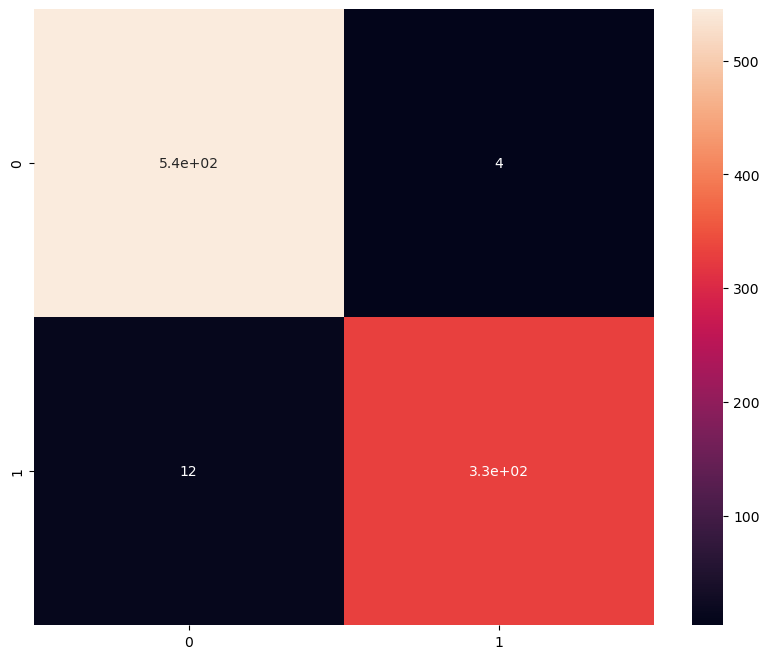

In [70]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y,y_pred),annot=True)
plt.show()

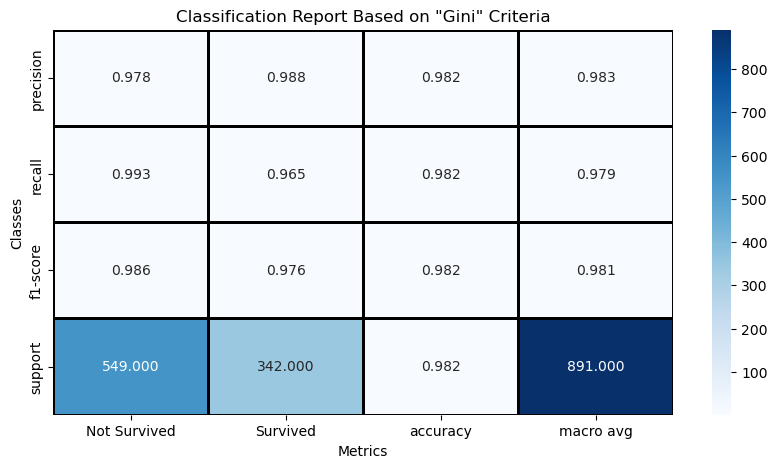

In [71]:
report = classification_report(y, y_pred, target_names=['Not Survived','Survived'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report Based on "Gini" Criteria')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

In [72]:
result_data = test_data.copy()
result_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,0,1
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,0,1
896,3,0,22.0,1,1,12.2875,0,1


In [73]:
result_data['Survived'] = rfc.predict(result_data)

In [74]:
result_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0,0
893,3,0,47.0,1,0,7.0000,0,1,0
894,2,1,62.0,0,0,9.6875,1,0,0
895,3,1,27.0,0,0,8.6625,0,1,1
896,3,0,22.0,1,1,12.2875,0,1,0


In [76]:
result_data.drop(['Sex','Pclass','Age','SibSp','SibSp','Fare','Q_Embarked','S_Embarked'],axis=1,inplace=True)

,Parch,Survived
PassengerId,,
892,0,0
893,0,0
894,0,0
895,0,1
896,1,0


In [77]:
result_data.drop(['Parch'],axis=1,inplace=True)
result_data.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,0


In [78]:
result_data.shape

(418, 1)

In [79]:
result_data.to_csv("results.csv")

## The Classification achived for the test data as per Kaggle is 75.598 %

### Hence i will do the Hyperparameter tuning for the model

In [80]:
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid = {
    'n_estimators': [800,900,1000],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [82]:
rf = RandomForestClassifier()

In [83]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [84]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [800, 900, 1000]},
             scoring='accuracy')

In [85]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1000}
Best accuracy found:  0.8294206264515724


In [86]:
modified_final_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 1000,random_state=42)

In [87]:
modified_final_model.fit(x,y)

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

In [89]:
result_data1 = test_data.copy()

In [90]:
result_data1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,0,1
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,0,1
896,3,0,22.0,1,1,12.2875,0,1


In [91]:
result_data1['Survived'] = modified_final_model.predict(result_data1)

In [93]:
result_data1.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Q_Embarked','S_Embarked'],axis=1,inplace=True)
result_data1.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [94]:
result_data1.to_csv("results_new.csv")

## 76.79 % Accuracy as Per Kaggle will increase the number of estimators now 

In [95]:
param_grid_new = {
    'n_estimators': [1000,2000,3000,4000,5000,6000,7000,8000,9000,10000],
    'max_depth': [10],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}

In [96]:
rfc_new = RandomForestClassifier()

In [97]:
modified_grid_serch = GridSearchCV(estimator=rfc_new,param_grid=param_grid_new,cv=7, scoring='accuracy')

In [98]:
modified_grid_serch.fit(x,y)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [1000, 2000, 3000, 4000, 5000, 6000,
                                          7000, 8000, 9000, 10000]},
             scoring='accuracy')

In [99]:
print("Best parameters found: ", modified_grid_serch.best_params_)
print("Best accuracy found: ", modified_grid_serch.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 4000}
Best accuracy found:  0.8373347862767156


In [100]:
result_data2 = test_data.copy()

In [101]:
result_data2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked
PassengerId,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0
893,3,0,47.0,1,0,7.0000,0,1
894,2,1,62.0,0,0,9.6875,1,0
895,3,1,27.0,0,0,8.6625,0,1
896,3,0,22.0,1,1,12.2875,0,1


In [103]:
gsv_optimum_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 4000,random_state=42)

In [104]:
gsv_optimum_model.fit(x,y)

RandomForestClassifier(max_depth=10, n_estimators=4000, random_state=42)

In [105]:
result_data2['Survived'] = modified_final_model.predict(result_data2)

In [106]:
result_data2.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Q_Embarked,S_Embarked,Survived
PassengerId,,,,,,,,,
892,3,1,34.5,0,0,7.8292,1,0,0
893,3,0,47.0,1,0,7.0000,0,1,0
894,2,1,62.0,0,0,9.6875,1,0,0


In [107]:
result_data2.drop(['Pclass','Sex','Age','SibSp','Parch','Fare','Q_Embarked','S_Embarked'],axis=1,inplace=True)
result_data2.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,0


In [108]:
result_data1.to_csv("optimum_gsc.csv")

## Note : - Eventhough the Grid Search accuracy increase with number of estimators = 4000 there was no substantial increase in accracy of the model (76.97 % as per Kaggle solution)